# Price Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptop_processed.csv')

In [3]:
categorical_features = ["Brand", "Processor", "GPU", "Operating_System", "Storage_Type"]
numerical_features = ["RAM(GB)", "Storage_Size(GB)", "ResolutionX", "ResolutionY", 
                      "Screen_Size(inch)", "Battery_Life(hours)", "Weight(kg)"]
target = "Price(€)"

### Encoding and Scaling Features

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# encoding categorical column
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# scaling numerical column
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

In [5]:
X = pd.concat([encoded_df, scaled_df], axis=1)
y = df[target]

### Splitting data to training and testing

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Importing required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

### Model using activation function as tanh

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="tanh", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [10]:
model.compile(optimizer="sgd", loss="mse", metrics=["mae"])

### Model fitting

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1665989.2500 - mae: 951.7299 - val_loss: 1507995.3750 - val_mae: 888.6755
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1493882.2500 - mae: 908.4963 - val_loss: 1505205.1250 - val_mae: 922.8645
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1506260.7500 - mae: 902.5293 - val_loss: 1887826.6250 - val_mae: 911.5035
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1435887.0000 - mae: 875.5500 - val_loss: 1675634.2500 - val_mae: 1050.7317
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1431080.8750 - mae: 883.6699 - val_loss: 1516859.6250 - val_mae: 883.3339
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1483611.8750 - mae: 901.1657 - val_loss: 1624059.1250 - val_mae: 872.7169
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1465497.6250 - mae: 892.1078 - val_loss: 1500432.6250 - val_mae: 900.3176
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1

In [12]:
import matplotlib.pyplot as plt

### Ploting training and validation loss and MAE

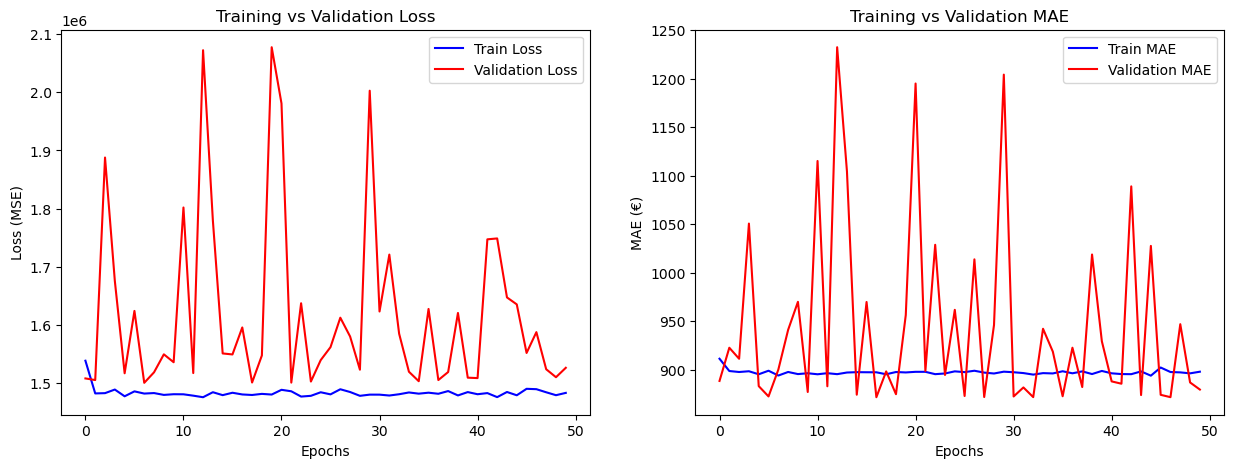

In [13]:
# Extract loss & MAE from training history
history_dict = history.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()


In [14]:
model.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [15]:
history2 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1473170.6250 - mae: 855.6672 - val_loss: 1526116.5000 - val_mae: 879.8458
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1446308.8750 - mae: 860.3834 - val_loss: 1526036.6250 - val_mae: 879.8704
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1490375.6250 - mae: 861.8488 - val_loss: 1525974.6250 - val_mae: 879.8897
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1415597.2500 - mae: 850.5339 - val_loss: 1525922.6250 - val_mae: 879.9058
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1443530.0000 - mae: 853.2142 - val_loss: 1525876.0000 - val_mae: 879.9203
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1492994.0000 - mae: 873.2241 - val_loss: 1525834.8750 - val_mae: 879.9330
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1485648.6250 - mae: 865.6322 - val_loss: 1525797.3750 - val_mae: 879.9447
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14

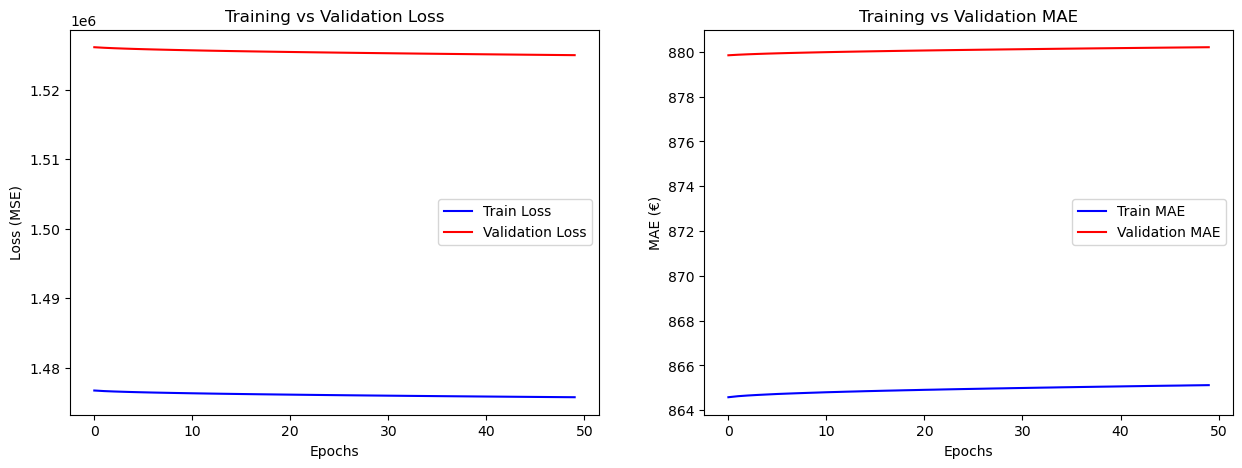

In [16]:
# Extract loss & MAE from training history
history_dict = history2.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()


In [17]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [18]:
history3 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1502419.7500 - mae: 871.7486 - val_loss: 1523587.0000 - val_mae: 880.6696
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1474636.6250 - mae: 875.5847 - val_loss: 1522137.7500 - val_mae: 881.1812
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1511237.5000 - mae: 870.9561 - val_loss: 1520836.7500 - val_mae: 881.6690
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1449978.1250 - mae: 866.1898 - val_loss: 1519548.6250 - val_mae: 882.1746
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1441615.5000 - mae: 863.9574 - val_loss: 1518364.8750 - val_mae: 882.6648
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1432759.2500 - mae: 859.5556 - val_loss: 1517284.6250 - val_mae: 883.1395
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1495151.3750 - mae: 868.2879 - val_loss: 1516217.8750 - val_mae: 883.6329
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14

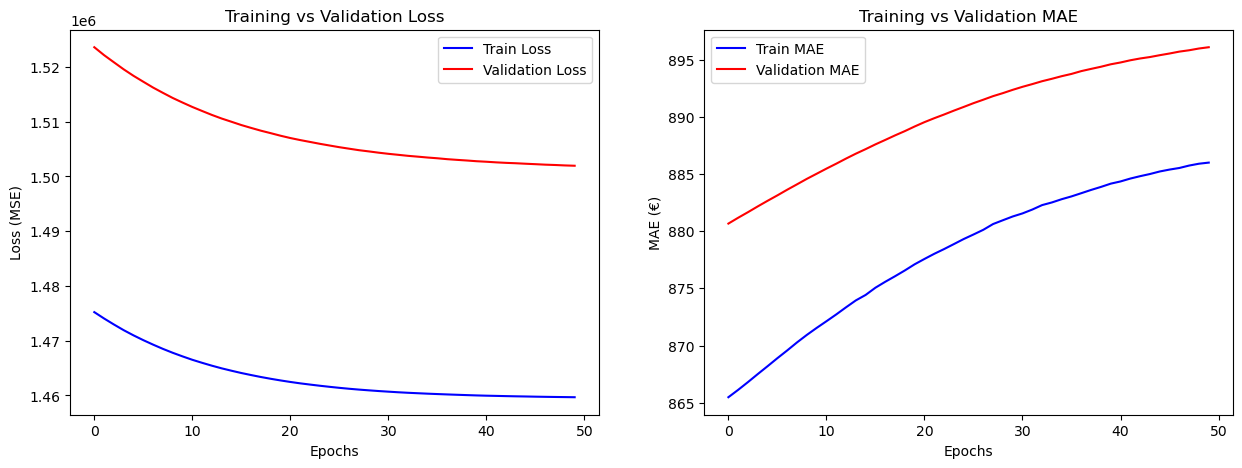

In [19]:
# Extract loss & MAE from training history
history_dict = history3.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()


In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(64, activation="tanh", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,809 (30.50 KB)

 Trainable params: 7,809 (30.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model2.compile(optimizer="sgd", loss="mse", metrics=["mae"])

In [23]:
history4 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1705893.7500 - mae: 971.9178 - val_loss: 1662020.6250 - val_mae: 1043.1879
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1537710.1250 - mae: 922.2809 - val_loss: 1976529.0000 - val_mae: 1193.1849
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1515315.1250 - mae: 921.4266 - val_loss: 2606006.0000 - val_mae: 1115.2827
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1525807.8750 - mae: 912.7703 - val_loss: 1521235.1250 - val_mae: 944.3450
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1505880.6250 - mae: 908.8618 - val_loss: 1934305.3750 - val_mae: 921.7964
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1552470.1250 - mae: 925.3146 - val_loss: 2268059.7500 - val_mae: 1008.9257
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1545066.3750 - mae: 917.8399 - val_loss: 1500603.0000 - val_mae: 899.6425
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

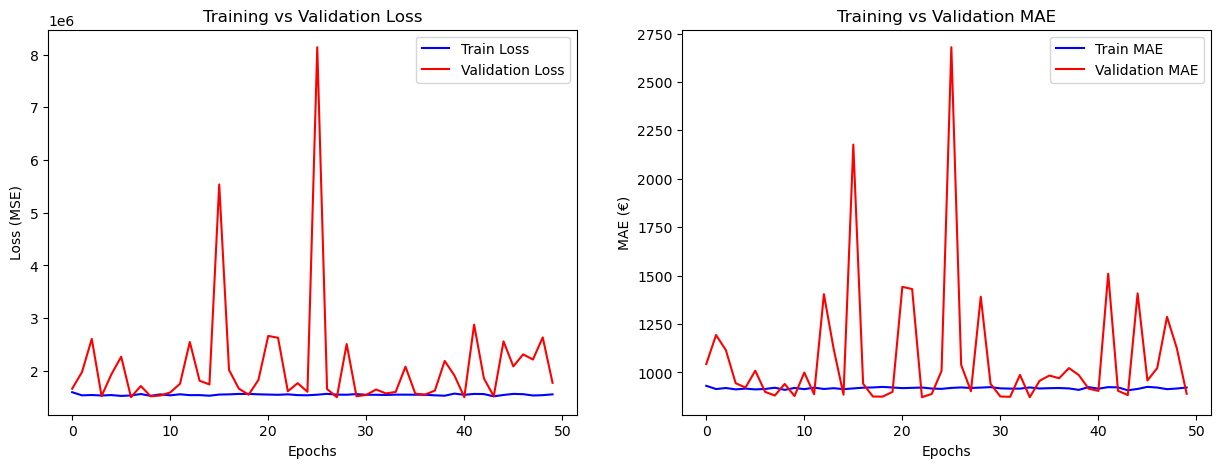

In [24]:
# Extract loss & MAE from training history
history_dict = history4.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [25]:
model2.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [26]:
history5 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1679048.8750 - mae: 856.0734 - val_loss: 1770770.5000 - val_mae: 889.4551
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1745644.1250 - mae: 878.0981 - val_loss: 1769894.3750 - val_mae: 889.3154
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1660391.6250 - mae: 853.6371 - val_loss: 1769222.2500 - val_mae: 889.2082
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1696464.6250 - mae: 863.9050 - val_loss: 1768657.5000 - val_mae: 889.1186
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1654951.8750 - mae: 854.0322 - val_loss: 1768158.1250 - val_mae: 889.0396
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1646324.7500 - mae: 855.0582 - val_loss: 1767705.3750 - val_mae: 888.9683
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1670203.5000 - mae: 853.2365 - val_loss: 1767291.8750 - val_mae: 888.9033
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17

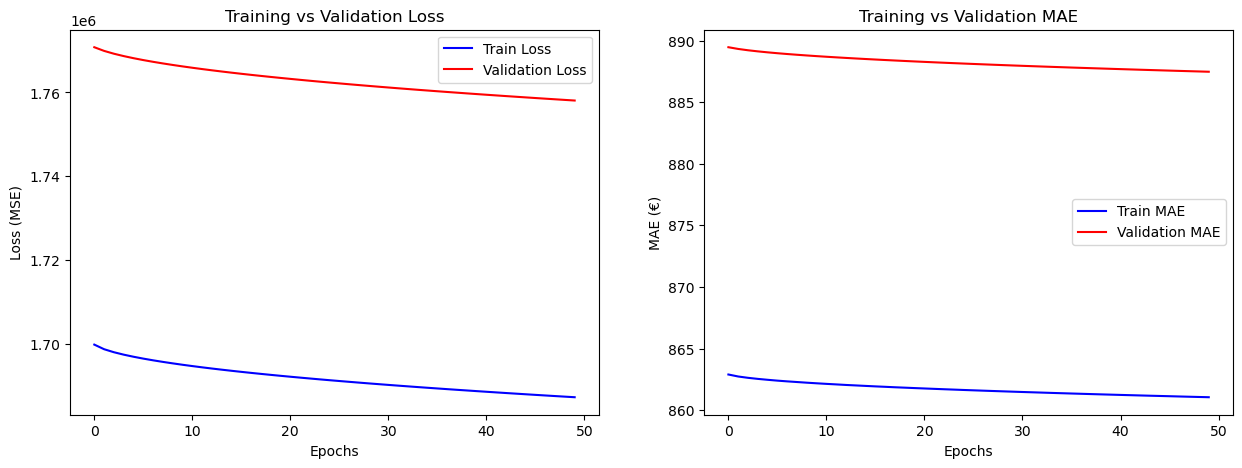

In [27]:
# Extract loss & MAE from training history
history_dict = history5.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [28]:
model2.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [29]:
history6 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1703421.1250 - mae: 864.3393 - val_loss: 1741098.5000 - val_mae: 884.8940
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1592983.5000 - mae: 847.9520 - val_loss: 1724897.5000 - val_mae: 882.5267
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1691952.2500 - mae: 855.1363 - val_loss: 1709474.3750 - val_mae: 880.4573
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1618049.5000 - mae: 850.9174 - val_loss: 1694810.7500 - val_mae: 878.6631
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1640143.0000 - mae: 845.9801 - val_loss: 1680835.5000 - val_mae: 877.0852
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1667845.6250 - mae: 859.6851 - val_loss: 1667725.0000 - val_mae: 875.8015
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1545977.8750 - mae: 838.0028 - val_loss: 1655171.2500 - val_mae: 874.7197
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15

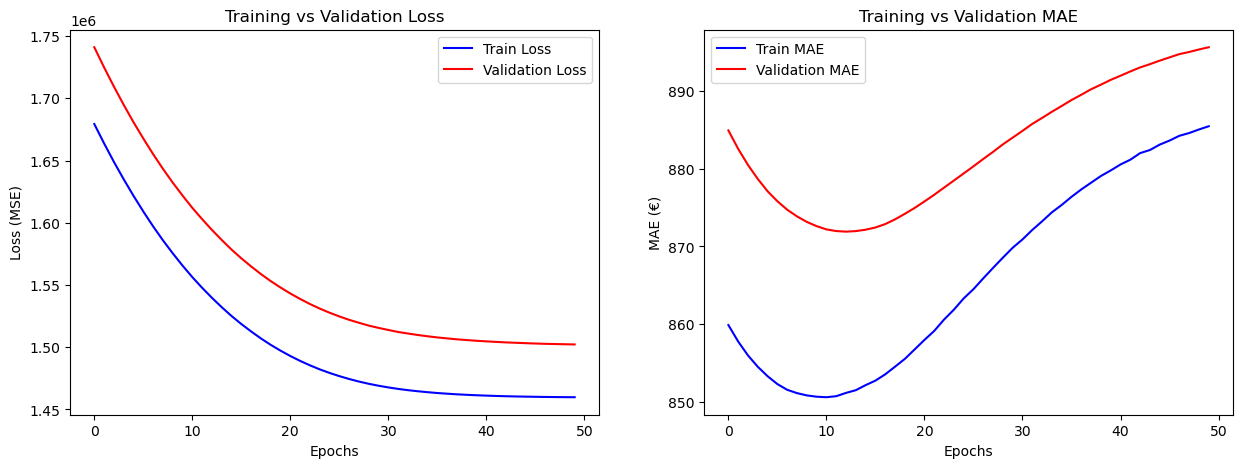

In [30]:
# Extract loss & MAE from training history
history_dict = history6.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [31]:
model3 = keras.Sequential([
    Dense(128, activation="tanh", input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # ✅ Drop 30% of neurons

    Dense(64, activation="tanh"),
    Dropout(0.3),

    Dense(32, activation="tanh"),
    Dropout(0.2),

    Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model3.compile(optimizer="sgd", loss="mse", metrics=["mae"])

In [34]:
history7 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1788387.1250 - mae: 969.0356 - val_loss: 1596213.1250 - val_mae: 871.9004
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1541495.7500 - mae: 901.2094 - val_loss: 1576651.0000 - val_mae: 990.4056
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1543369.7500 - mae: 905.0543 - val_loss: 1500123.6250 - val_mae: 901.9520
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1546713.1250 - mae: 918.2194 - val_loss: 1514742.7500 - val_mae: 884.3635
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1470038.7500 - mae: 888.7291 - val_loss: 1507321.7500 - val_mae: 889.2601
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1474037.5000 - mae: 890.8375 - val_loss: 1500741.7500 - val_mae: 911.8096
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1498299.8750 - mae: 895.6150 - val_loss: 1600262.6250 - val_mae: 871.9357
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14

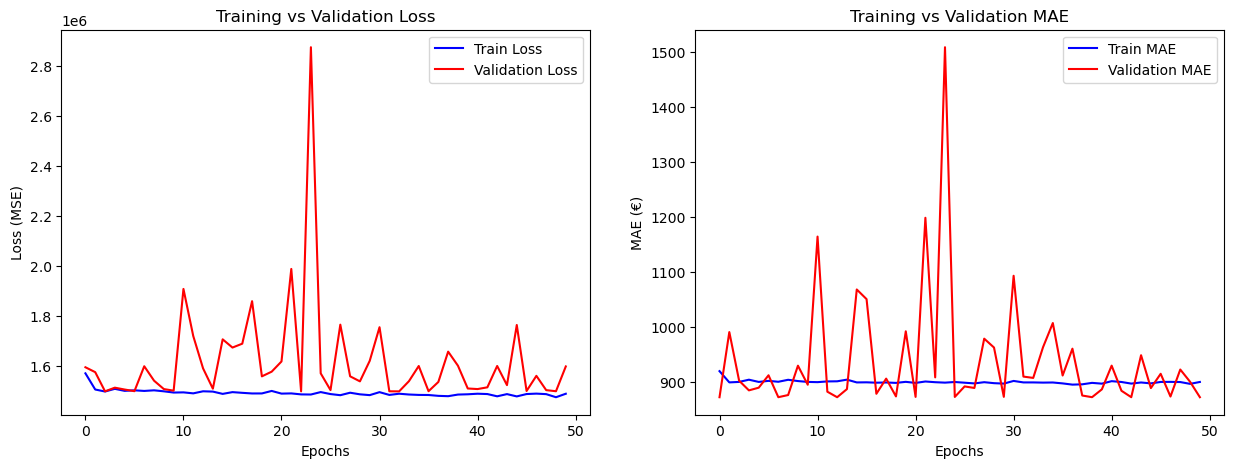

In [39]:
# Extract loss & MAE from training history
history_dict = history7.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [35]:
model3.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [36]:
history8 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1614794.8750 - mae: 865.0732 - val_loss: 1599000.5000 - val_mae: 871.9198
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1593014.5000 - mae: 859.1666 - val_loss: 1598781.5000 - val_mae: 871.9172
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1471255.0000 - mae: 840.4534 - val_loss: 1598615.7500 - val_mae: 871.9153
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1543648.1250 - mae: 849.9086 - val_loss: 1598475.7500 - val_mae: 871.9133
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1505340.0000 - mae: 844.3978 - val_loss: 1598351.7500 - val_mae: 871.9122
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1495321.7500 - mae: 843.9346 - val_loss: 1598239.3750 - val_mae: 871.9108
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1562944.8750 - mae: 855.0273 - val_loss: 1598136.8750 - val_mae: 871.9097
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14

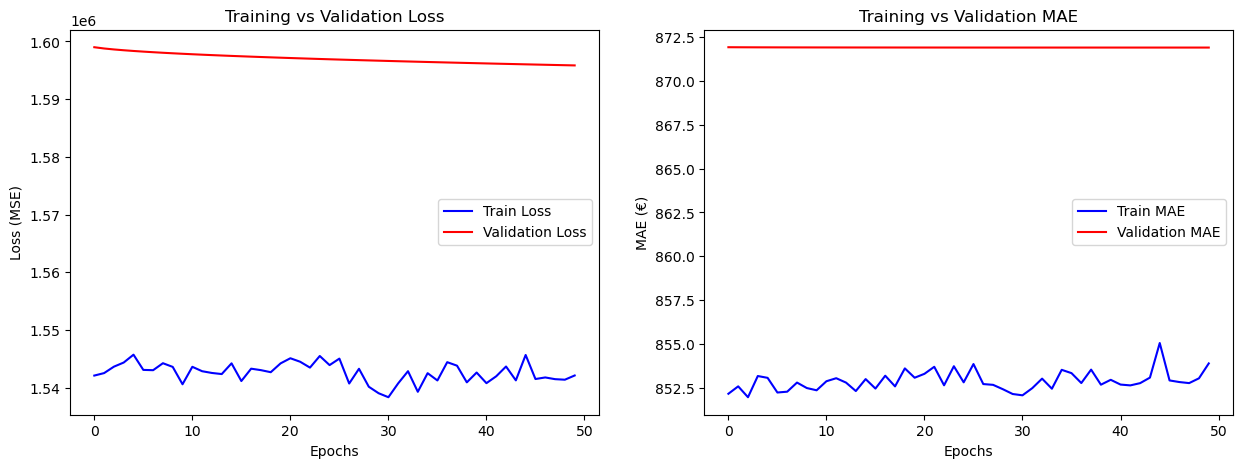

In [40]:
# Extract loss & MAE from training history
history_dict = history8.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [37]:
model3.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [38]:
history9 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1533325.8750 - mae: 847.2798 - val_loss: 1591394.5000 - val_mae: 871.9116
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1528313.2500 - mae: 852.2275 - val_loss: 1587125.3750 - val_mae: 871.9581
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1593212.7500 - mae: 865.6011 - val_loss: 1583042.5000 - val_mae: 872.0351
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1513806.0000 - mae: 854.6360 - val_loss: 1579162.7500 - val_mae: 872.1317
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1474139.5000 - mae: 845.5796 - val_loss: 1575386.2500 - val_mae: 872.2629
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1455579.8750 - mae: 837.0635 - val_loss: 1571688.5000 - val_mae: 872.4250
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1467740.6250 - mae: 836.4713 - val_loss: 1568178.0000 - val_mae: 872.6307
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15

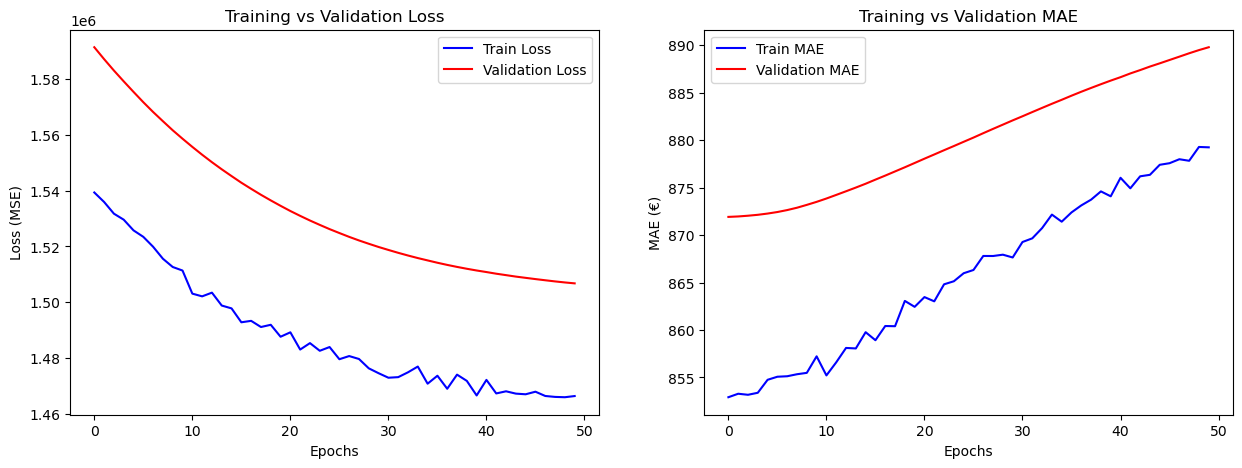

In [41]:
# Extract loss & MAE from training history
history_dict = history9.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [42]:
model4 = keras.Sequential([
    Dense(64, activation="sigmoid", input_shape=(X_train.shape[1],)),
    Dense(32, activation="sigmoid"),
    Dense(32, activation="sigmoid"),
    Dense(64, activation="sigmoid"),
    Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model4.compile(optimizer="sgd", loss="mse", metrics=["mae"])

In [44]:
history10 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1628741.0000 - mae: 930.1940 - val_loss: 1500907.2500 - val_mae: 912.4534
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1494724.5000 - mae: 897.8474 - val_loss: 1514636.5000 - val_mae: 936.6963
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1504723.1250 - mae: 912.2051 - val_loss: 2140766.7500 - val_mae: 1259.0670
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1544750.1250 - mae: 920.9256 - val_loss: 1749174.3750 - val_mae: 886.1116
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1501352.6250 - mae: 907.7038 - val_loss: 1648731.6250 - val_mae: 874.2330
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1492556.3750 - mae: 892.0915 - val_loss: 1591689.1250 - val_mae: 1000.6207
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1526023.5000 - mae: 906.7411 - val_loss: 1890734.3750 - val_mae: 912.1254
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 

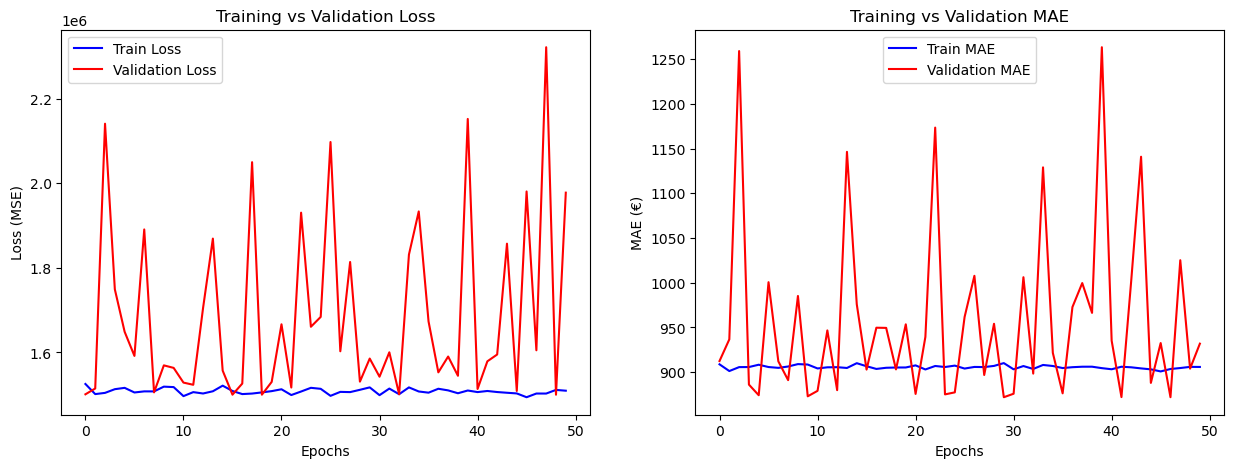

In [45]:
# Extract loss & MAE from training history
history_dict = history10.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [46]:
model4.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [47]:
history11 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1971858.6250 - mae: 912.5874 - val_loss: 1975516.5000 - val_mae: 931.3683
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1926608.8750 - mae: 908.9586 - val_loss: 1974561.5000 - val_mae: 931.1428
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1886689.0000 - mae: 902.6687 - val_loss: 1973831.3750 - val_mae: 930.9707
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1795847.7500 - mae: 876.2554 - val_loss: 1973215.6250 - val_mae: 930.8258
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1848193.5000 - mae: 899.6516 - val_loss: 1972673.7500 - val_mae: 930.6981
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1873007.3750 - mae: 899.0297 - val_loss: 1972185.5000 - val_mae: 930.5835
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2027543.2500 - mae: 928.4397 - val_loss: 1971737.2500 - val_mae: 930.4777
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18

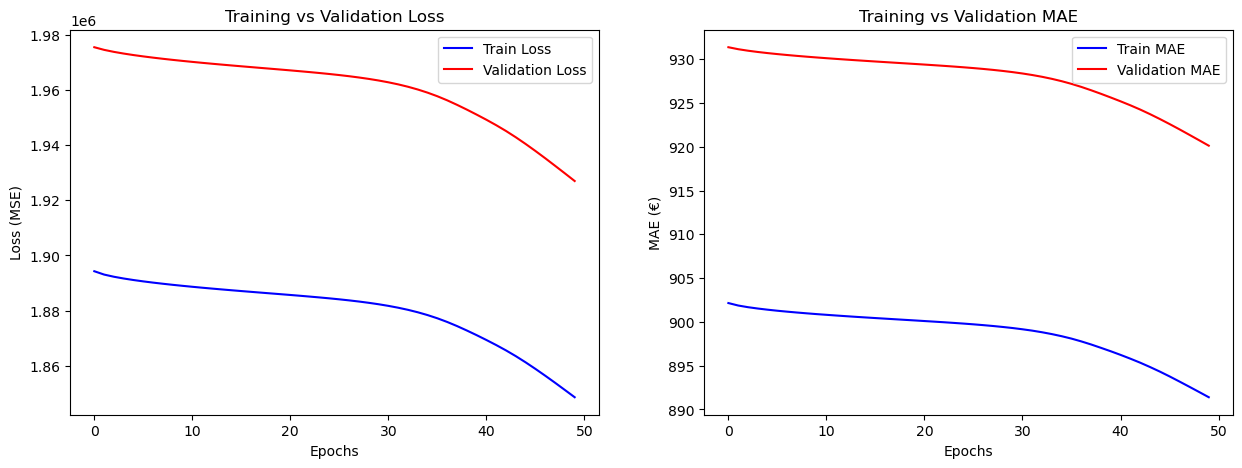

In [48]:
# Extract loss & MAE from training history
history_dict = history11.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [49]:
model4.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [50]:
history12 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1788891.5000 - mae: 882.8600 - val_loss: 1853146.6250 - val_mae: 904.0999
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1680478.0000 - mae: 845.4299 - val_loss: 1564208.0000 - val_mae: 779.2929
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1494325.3750 - mae: 754.2861 - val_loss: 1514230.6250 - val_mae: 761.9824
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1385614.0000 - mae: 728.7619 - val_loss: 1496405.7500 - val_mae: 757.8002
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1461824.2500 - mae: 738.1871 - val_loss: 1480003.3750 - val_mae: 753.9483
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1397268.2500 - mae: 723.2285 - val_loss: 1464517.0000 - val_mae: 750.3818
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1355400.3750 - mae: 722.2142 - val_loss: 1449596.3750 - val_mae: 747.2510
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13

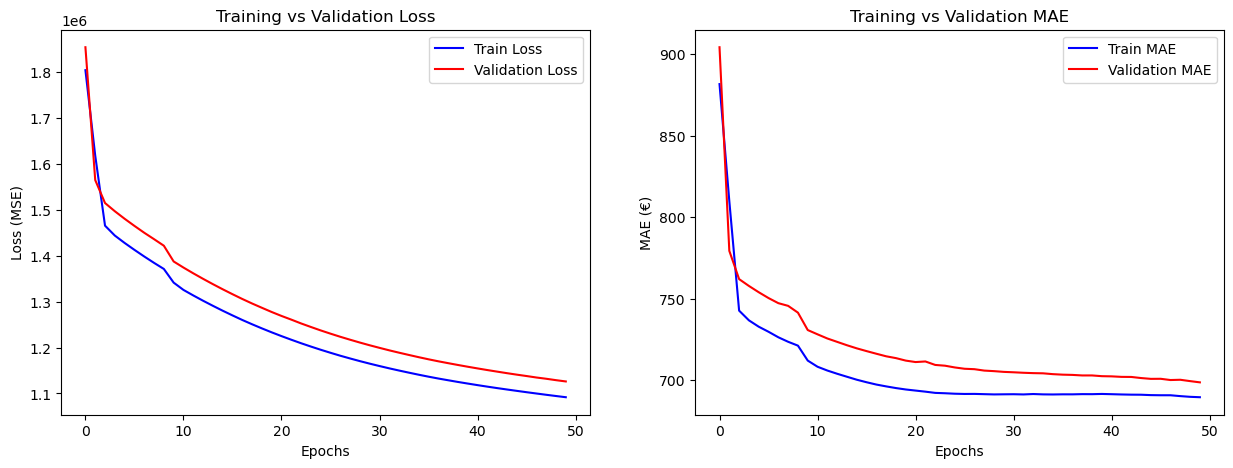

In [51]:
# Extract loss & MAE from training history
history_dict = history12.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [52]:
from tensorflow.keras.regularizers import l2

In [53]:
model5 = keras.Sequential([
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.01)),
    keras.layers.Dense(32, activation="sigmoid", kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model5.compile(optimizer="sgd", loss="mse", metrics=["mae"])

In [56]:
history13 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1633651.1250 - mae: 935.5175 - val_loss: 1526215.7500 - val_mae: 881.6108
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1496051.5000 - mae: 899.2149 - val_loss: 1520251.3750 - val_mae: 937.8798
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1402135.5000 - mae: 872.7227 - val_loss: 1569570.3750 - val_mae: 982.3782
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1437156.1250 - mae: 890.8270 - val_loss: 1540513.1250 - val_mae: 877.2041
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1549811.7500 - mae: 911.5785 - val_loss: 1513079.5000 - val_mae: 887.6967
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1487891.0000 - mae: 899.4529 - val_loss: 1503295.2500 - val_mae: 904.9610
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1486414.2500 - mae: 890.0070 - val_loss: 1571970.8750 - val_mae: 872.5782
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14

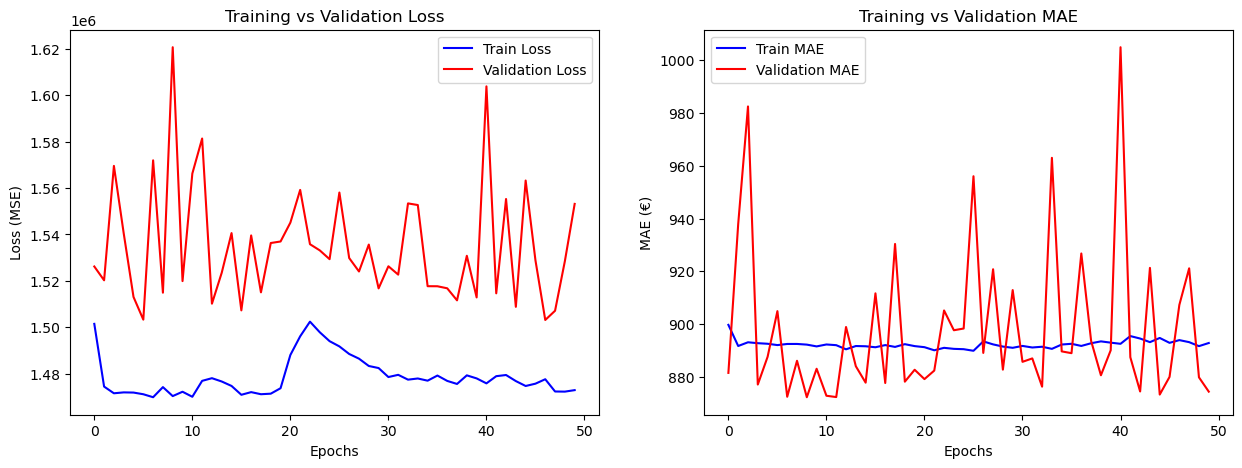

In [57]:
# Extract loss & MAE from training history
history_dict = history13.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [58]:
model5.compile(optimizer="adagrad", loss="mse", metrics=["mae"])

In [59]:
history14 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1480105.0000 - mae: 844.5692 - val_loss: 1553009.0000 - val_mae: 874.5452
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1535005.6250 - mae: 860.7049 - val_loss: 1552925.1250 - val_mae: 874.5570
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1499658.8750 - mae: 850.2569 - val_loss: 1552860.7500 - val_mae: 874.5656
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1418950.1250 - mae: 842.6190 - val_loss: 1552807.7500 - val_mae: 874.5733
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1502296.2500 - mae: 853.7875 - val_loss: 1552760.5000 - val_mae: 874.5796
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1538593.5000 - mae: 861.3657 - val_loss: 1552717.7500 - val_mae: 874.5856
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1459300.1250 - mae: 846.3972 - val_loss: 1552679.3750 - val_mae: 874.5909
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14

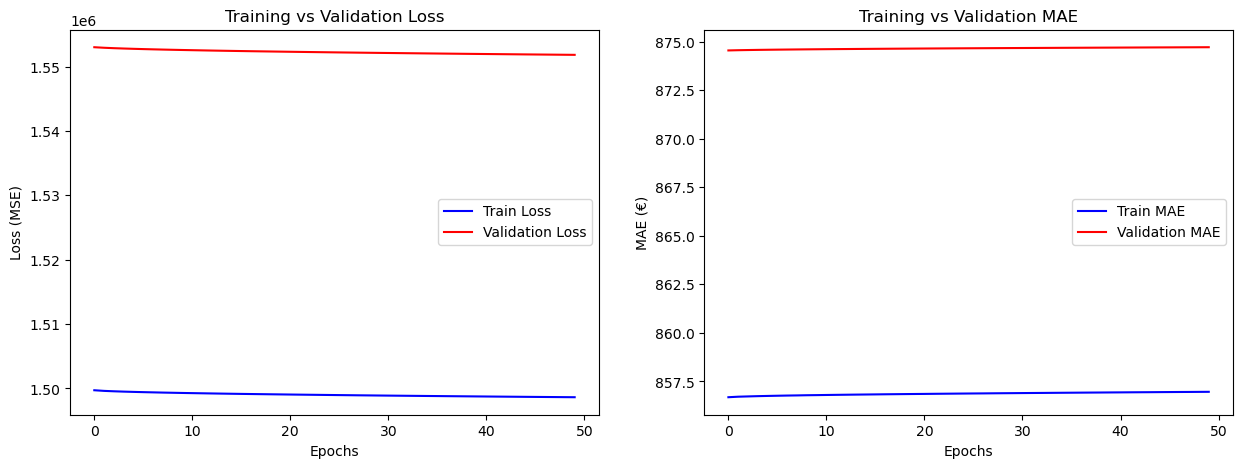

In [60]:
# Extract loss & MAE from training history
history_dict = history14.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [62]:
model5.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [63]:
history15 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1472082.2500 - mae: 852.4424 - val_loss: 1474045.2500 - val_mae: 821.4242
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1407223.1250 - mae: 789.2024 - val_loss: 1437851.8750 - val_mae: 791.3440
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1373083.2500 - mae: 768.2236 - val_loss: 1292328.0000 - val_mae: 732.0492
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1204635.7500 - mae: 704.8244 - val_loss: 1283143.6250 - val_mae: 721.8712
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1264059.0000 - mae: 707.0952 - val_loss: 1278843.1250 - val_mae: 719.0487
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1213088.5000 - mae: 696.8358 - val_loss: 1275199.1250 - val_mae: 716.8531
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1216699.3750 - mae: 698.9716 - val_loss: 1272013.3750 - val_mae: 715.7241
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11

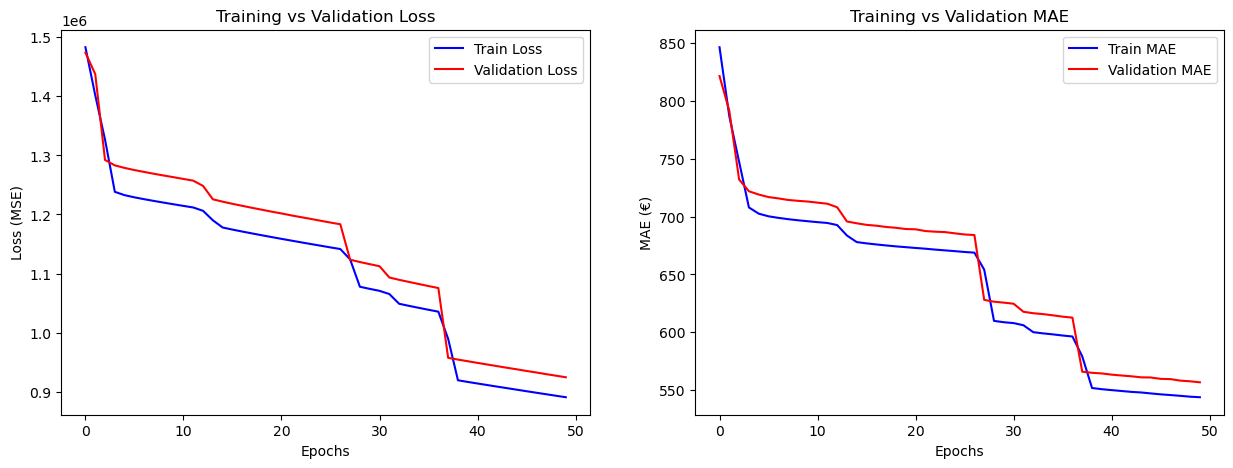

In [64]:
# Extract loss & MAE from training history
history_dict = history15.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [65]:
model6 = keras.Sequential([
    keras.layers.Dense(128, activation="sigmoid", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.01)),
    keras.layers.Dense(32, activation="sigmoid", kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model6.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [67]:
history16 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 885078.3125 - mae: 546.6575 - val_loss: 921716.9375 - val_mae: 556.3466
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 890818.7500 - mae: 539.6210 - val_loss: 919149.3125 - val_mae: 555.7695
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 884436.8125 - mae: 542.8081 - val_loss: 916512.9375 - val_mae: 554.6410
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 861215.8125 - mae: 535.0763 - val_loss: 913968.3125 - val_mae: 554.1737
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 907759.4375 - mae: 549.5591 - val_loss: 911492.8125 - val_mae: 553.9536
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 949857.7500 - mae: 561.6741 - val_loss: 830932.1875 - val_mae: 522.4979
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 784896.1250 - mae: 505.8143 - val_loss: 828450.9375 - val_mae: 521.5416
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 790695.1875 - ma

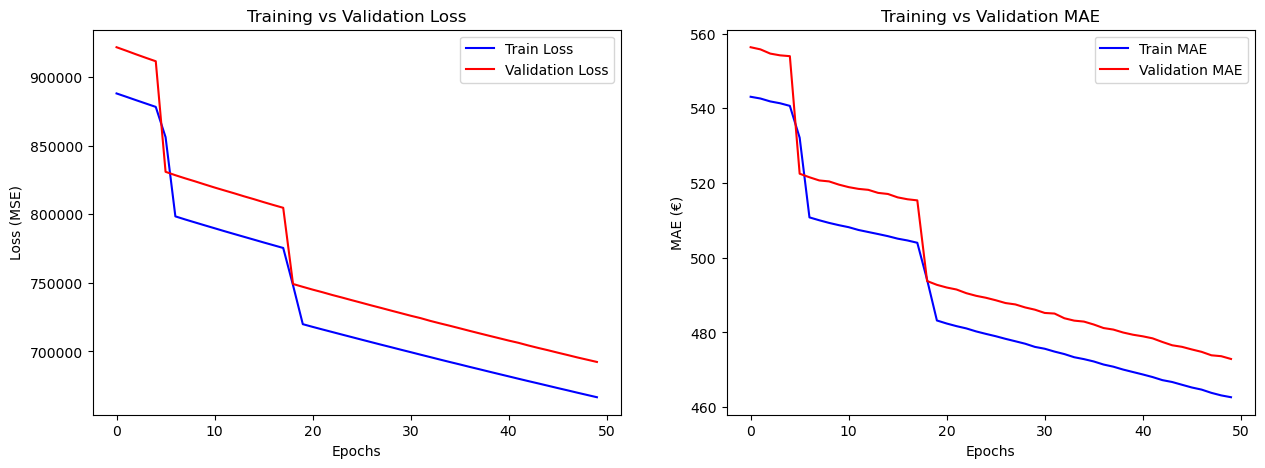

In [68]:
# Extract loss & MAE from training history
history_dict = history16.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [77]:
model7 = keras.Sequential([
    keras.layers.Dense(128, activation="sigmoid", kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,505 (68.38 KB)

 Trainable params: 17,505 (68.38 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model7.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history17 = model7.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5425540.5000 - mae: 1993.3136 - val_loss: 5562557.0000 - val_mae: 2015.6068
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5446651.0000 - mae: 1991.6198 - val_loss: 5510594.0000 - val_mae: 2002.6753
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5435814.5000 - mae: 1977.6569 - val_loss: 5455230.5000 - val_mae: 1988.8046
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5403014.5000 - mae: 1968.5950 - val_loss: 5392951.0000 - val_mae: 1973.0850
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5161729.0000 - mae: 1936.9066 - val_loss: 5328840.0000 - val_mae: 1956.7710
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5155635.0000 - mae: 1922.8174 - val_loss: 5266381.0000 - val_mae: 1940.7455
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5341724.5000 - mae: 1942.2598 - val_loss: 5207882.5000 - val_mae: 1925.6156
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 

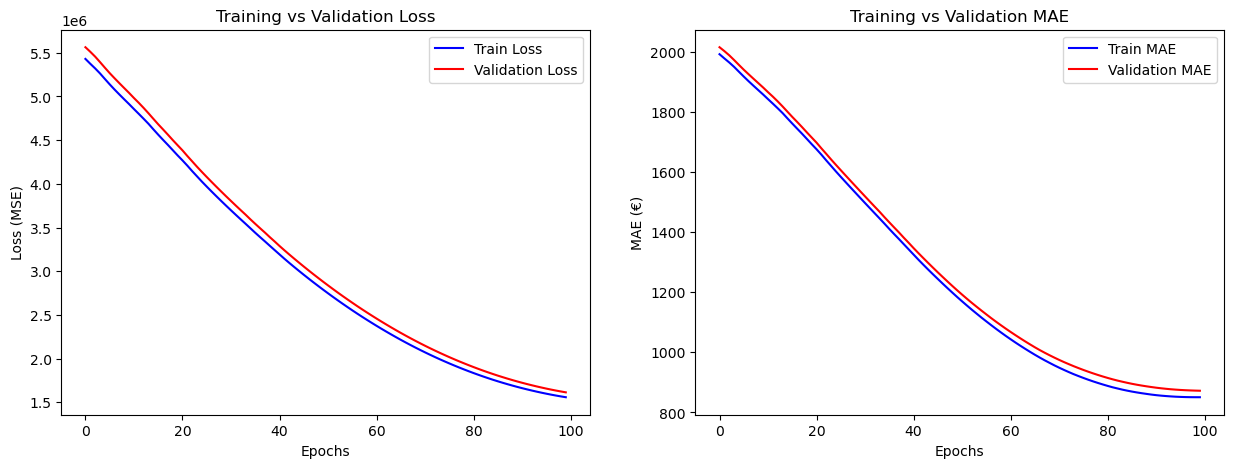

In [82]:
# Extract loss & MAE from training history
history_dict = history17.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [83]:
model8 = keras.Sequential([
    keras.layers.Dense(128, activation="sigmoid", kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation="sigmoid", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model8.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,561 (72.50 KB)

 Trainable params: 18,561 (72.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model8.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [86]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history18 = model8.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=42, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5399627.5000 - mae: 1999.4044 - val_loss: 5566576.0000 - val_mae: 2016.6034
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5485637.5000 - mae: 2003.7195 - val_loss: 5520174.0000 - val_mae: 2005.0654
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5445871.5000 - mae: 1983.7963 - val_loss: 5471085.0000 - val_mae: 1992.7867
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5432583.0000 - mae: 1975.9016 - val_loss: 5422696.5000 - val_mae: 1980.6082
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5181765.0000 - mae: 1936.5348 - val_loss: 5371811.0000 - val_mae: 1967.7202
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5267643.0000 - mae: 1944.4324 - val_loss: 5324172.0000 - val_mae: 1955.5780
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5157664.5000 - mae: 1919.4351 - val_loss: 5275856.5000 - val_mae: 1943.1852
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 

In [87]:
history18 = model8.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=42, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1938028.6250 - mae: 910.4161 - val_loss: 1987331.2500 - val_mae: 934.1873
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1867903.3750 - mae: 897.3746 - val_loss: 1969394.7500 - val_mae: 929.9249
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1896682.6250 - mae: 899.0014 - val_loss: 1951841.8750 - val_mae: 925.8090
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1873935.3750 - mae: 895.3559 - val_loss: 1934748.0000 - val_mae: 921.8970
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1814373.5000 - mae: 888.6243 - val_loss: 1918060.7500 - val_mae: 918.1215
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1823354.1250 - mae: 878.3034 - val_loss: 1901641.5000 - val_mae: 914.4865
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1855671.0000 - mae: 901.1193 - val_loss: 1885543.7500 - val_mae: 911.0149
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

In [88]:
model9 = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model9.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 32)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model9.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [92]:
history19 = model9.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5231734.0000 - mae: 1957.0287 - val_loss: 3716700.2500 - val_mae: 1557.9871
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2481946.0000 - mae: 1163.4333 - val_loss: 733879.0000 - val_mae: 576.1461
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 625847.7500 - mae: 534.6214 - val_loss: 439772.1562 - val_mae: 435.4280
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 366358.5312 - mae: 401.7310 - val_loss: 286345.1562 - val_mae: 334.3833
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252637.2500 - mae: 319.3953 - val_loss: 211478.9531 - val_mae: 291.1446
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 197468.4844 - mae: 285.3060 - val_loss: 176609.2500 - val_mae: 279.7980
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167575.6875 - mae: 274.6774 - val_loss: 156192.4844 - val_mae: 267.5834
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136394.890

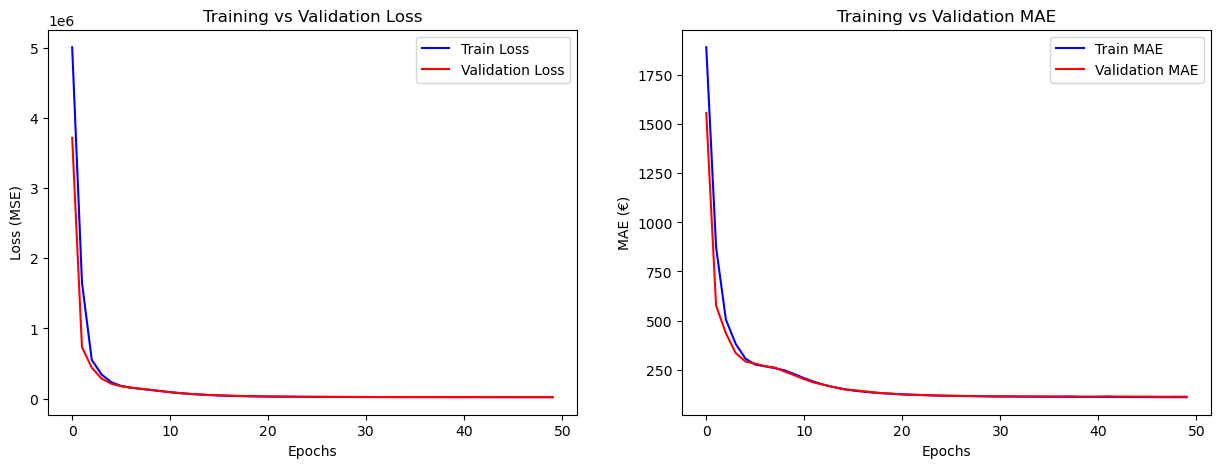

In [93]:
# Extract loss & MAE from training history
history_dict = history19.history

# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train Loss", color="blue")
plt.plot(history_dict["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict["mae"], label="Train MAE", color="blue")
plt.plot(history_dict["val_mae"], label="Validation MAE", color="red")
plt.xlabel("Epochs")
plt.ylabel("MAE (€)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()

In [94]:
model10 = keras.Sequential([
    keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\dabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model10.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,417 (64.13 KB)

 Trainable params: 16,417 (64.13 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
from tensorflow.keras.optimizers import Adam

In [98]:
# Define Adam optimizer with custom parameters
adam_optimizer = Adam(
    learning_rate=0.001,  # Default is 0.001, try lower (0.0001) for stable training
    beta_1=0.9,           # Default is 0.9, controls momentum for moving averages
    beta_2=0.999,         # Default is 0.999, controls second moment estimates
    epsilon=1e-7          # Default is 1e-7, prevents division by zero
)

# Compile model with custom Adam optimizer
model10.compile(optimizer=adam_optimizer, loss="mse", metrics=["mae"])

In [99]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history20 = model10.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=42, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4048599.2500 - mae: 1606.9092 - val_loss: 284236.8125 - val_mae: 353.3303
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 190908.5938 - mae: 281.5050 - val_loss: 100710.1641 - val_mae: 216.8884
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88817.2891 - mae: 206.9662 - val_loss: 67213.3594 - val_mae: 176.0469
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49409.1406 - mae: 160.5189 - val_loss: 45513.8164 - val_mae: 150.5535
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37212.0352 - mae: 142.6602 - val_loss: 34483.6914 - val_mae: 133.4201
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30212.0000 - mae: 130.5362 - val_loss: 29448.1465 - val_mae: 124.8445
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25314.9453 - mae: 121.5254 - val_loss: 27881.3086 - val_mae: 124.5866
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26801.7109 - mae

In [100]:
from sklearn.metrics import r2_score

In [101]:
y_pred = model10.predict(X_test).flatten()

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [102]:
score = r2_score(y_test, y_pred)
print(f"r2 Score: {score}")

r2 Score: 0.9923013466651268


In [116]:
def predict_price(model, encoder, scaler, user_input):
    # Define the categorical and numerical features
    categorical_features = ["Brand", "Processor", "GPU", "Operating System", "Storage_Type"]
    numerical_features = ["RAM (GB)", "Storage_Size (GB)", "ResolutionX", "ResolutionY", 
                          "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)"]

    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # One-Hot Encode Categorical Features
    encoded_categorical = encoder.transform(input_df[categorical_features])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

    # Normalize Numerical Features
    scaled_numerical = scaler.transform(input_df[numerical_features])
    scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

    # Combine Encoded + Scaled Data
    X_user = pd.concat([encoded_df, scaled_df], axis=1)

    # Predict Price
    predicted_price = float(model.predict(X_user)[0][0])

    return round(predicted_price, 2)  # Return price rounded to 2 decimal places


In [123]:
# Example user input
user_laptop = {
    "Brand": "Acer",
    "Processor": "Intel i7",
    "RAM (GB)": 16,
    "GPU": "Nvidia RTX 3080",
    "Screen Size (inch)": 15.6,
    "ResolutionX": 2560,
    "ResolutionY": 1440,
    "Battery Life (hours)": 8.0,
    "Weight (kg)": 1.5,
    "Operating System": "Windows",
    "Storage_Size (GB)": 1024,
    "Storage_Type": "SSD"
}

In [124]:
# Predict the price
predicted_price = predict_price(model10, encoder, scaler, user_laptop)
print(f"Predicted Laptop Price: €{predicted_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Laptop Price: €1822.29
